In [1]:
library(devtools)
library(metacell)
load_all("../metacell.flow/")
scdb_init("output/scrna_db/",force_reinit = T)
scfigs_init("figs")
scdb_flow_init()

Loading required package: usethis

i Loading metacell.flow

initializing scdb to output/scrna_db/



In [2]:
mat_id = "mm_emb"
mc_id = "mm_emb"
feat_gset = "mm_emb"
mgraph_id = "mm_emb"

In [3]:
mat = scdb_mat(mat_id)
mc = scdb_mc(mc_id)
md = mat@cell_metadata
mgraph = scdb_mgraph(mgraph_id)

In [4]:
embs = unique(mat@cell_metadata[,c("embryo", "age_group_emb")])

In [5]:
cell_time = mat@cell_metadata[names(mc@mc),"age_group_emb"]
table(cell_time)
names(cell_time) = names(mc@mc)

cell_time
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 286  537 1961 1930 1990 2696 3721 3070 3828 4092 4753 5403 5610 5594 5710 5485 

In [6]:
cell_time = cell_time[!is.na(cell_time)]

In [7]:
cap_var_factor = rep(0.25,ncol(mc@e_gc))

# adjusting blood frequency
f_erythroid2 = mc@colors == '#D96B2B'
cap_var_factor[f_erythroid2] = 1

In [8]:
net_id = "mm_embflow"

In [16]:
# # generating the network
# mcell_mctnet_from_mgraph(net_id = net_id,
#                          capacity_var_factor = cap_var_factor,
#                          mgraph_id = mgraph_id,
#                          cell_time = cell_time,
#                          mc_proliferation_rate_fn = "mm_metacell_proliferation_rate.tsv",
#                          time_age_groups = df_age_groups$developmental_time,
#                          off_capacity_cost2 = 1000)

In [9]:
flow_id = "mm_embflow"

In [10]:
flow_id = "mm_embflow_test"
fig_dir = "figs/"

flow_tolerance = 0.02

message("generate flows")

mcell_new_mctnetflow(flow_id, net_id, 
                     init_mincost = T, flow_tolerance= flow_tolerance)

message("solved network flow problem")

mcf = scdb_mctnetflow(flow_id)

generate flows



ERROR: Error in .local(.Object, ...): MC-ERR unkown mctnetwork id mm_embflow_test when building a flow object


In [18]:
#compute propagatation forward and background
mcf = mctnetflow_comp_propagation(mcf)

#adding back the object with the network and flows
scdb_add_mctnetflow(flow_id, mcf)

In [10]:
mm_col_ord = c(
'#FACB12', #PGC
'#f7f79e', #Surface ectoderm
'#C3C388', #Neural crest
'#879E86', #Neural plate boundary
'#CDE088', #Neural tube/Floor plate
'#647A4F', #Forebrain/Midbrain/Hindbrain
'#354E23', #Caudal neural plate
'#649146', #Rostral neural plate
'#90BF75', #Definitive ectoderm
'#635547', #Epiblast
'#DABE99', #Primitive streak
'#9e6762', #Caudal epiblast
'#8e7e59', #Tail bud - neural
'#703C37', #Tail bud - mesoderm
'#C594BF', #Early nascent mesoderm
'#DFCDE4', #Late nascent mesoderm
'#1a3f52', #Caudal mesoderm
'#45d1c5', #Lateral & intermediate mesoderm
'#408DA1', #Paraxial mesoderm
'#A8DBF7', #Presomitic mesoderm
'#1AA2EB', #Somitic mesoderm
'#8DB5CE', #Rostral mesoderm
'#53f1fc', #Cardiopharyngeal mesoderm
'#B51D8D', #Cardiomyocytes
'#8870ad', #ExE mesoderm
'#cc7818', #Amnion/Chorion progenitor
'#824A09', #Amnion/Chorion
'#532C8A', #Allantois
'#ff891c', #Endothelial cells
'#FBBE92', #Haematoendothelial progenitors
'#C9A997', #Blood progenitors
'#C72228', #Erythroid 1
'#D96B2B', #Erythroid 2
'#FF5608', #Erythroid 3
'#c19f70', #Anterior Primitive Streak
'#0F4A9C', #Node/Notochord
'#F397C0', #Definitive endoderm
'#EF5A9D', #Gut
'#F25CD4' #Hindgut
)

In [ ]:
mm_mctnetwork_plot_net(mct_id = "mm_embflow",flow_id = "mm_embflow",fn = "figs/mm_embflow_test.png",
  show_over_under_flow = T,
  #     show_axes=F,
  #     mc_ord = rank,
  colors_ordered = mm_col_ord,
    plot_mc_ids = F,
#       h = 20000,
    w = 2000,
    h = 1000
)
# mct = scdb_mctnetwork("mm_embembflow")

In [6]:
net_id = "mm_embembflow2"

In [21]:
for(net_id in c(
#     "mctnetwork.mm_embembflow",                  
"mctnetwork.mm_embembflow2",                 
"mctnetwork.mm_embflow",                     
"mctnetwork.mm_embflow_one_nascent_mesoderm")){
    mct = scdb_mctnetwork(net_id)
    print(mct@mc_id)
}

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'print': trying to get slot "mc_id" from an object of a basic class ("NULL") with no slots


In [17]:
mct@

In [16]:
mcf@edge_flows

[1] 0

In [11]:
mct = scdb_mctnetwork(net_id)
mcf = scdb_mctnetflow(net_id)

In [12]:
mct@mc_id

[1] "mm_embemb"

In [11]:
mct@mc_id = mc_id

In [12]:
mgraph = scdb_mgraph(mct@mgraph_id)

In [14]:
mgraph@mc_id = mc_id

In [15]:
scdb_add_mgraph(id = mct@mgraph_id, mgraph = mgraph)

In [16]:
scdb_add_mctnetwork(id = net_id, mctnetwork = mct)

In [8]:
mc@colors

1         2         3         4         5         6         7         8 
"#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" 
        9        10        11        12        13        14        15        16 
"#635547" "#635547" "#635547" "#635547" "#635547" "#DABE99" "#635547" "#635547" 
       17        18        19        20        21        22        23        24 
"#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" 
       25        26        27        28        29        30        31        32 
"#DABE99" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" 
       33        34        35        36        37        38        39        40 
"#635547" "#635547" "#DABE99" "#635547" "#635547" "#635547" "#90BF75" "#90BF75" 
       41        42        43        44        45        46        47        48 
"#635547" "#635547" "#635547" "#635547" "#649146" "#635547" "#635547" "#635547" 
       49        50        51        52        53        54        55        56 
"#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" 
       57        58        59        60        61        62        63        64 
"#635547" "#635547" "#635547" "#90BF75" "#635547" "#635547" "#635547" "#635547" 
       65        66        67        68        69        70        71        72 
"#635547" "#90BF75" "#635547" "#635547" "#635547" "#635547" "#90BF75" "#649146" 
       73        74        75        76        77        78        79        80 
"#DABE99" "#635547" "#635547" "#635547" "#635547" "#635547" "#90BF75" "#635547" 
       81        82        83        84        85        86        87        88 
"#635547" "#635547" "#DABE99" "#635547" "#635547" "#635547" "#635547" "#635547" 
       89        90        91        92        93        94        95        96 
"#635547" "#635547" "#635547" "#90BF75" "#635547" "#DABE99" "#635547" "#635547" 
       97        98        99       100       101       102       103       104 
"#DABE99" "#635547" "#635547" "#90BF75" "#635547" "#635547" "#635547" "#635547" 
      105       106       107       108       109       110       111       112 
"#635547" "#635547" "#635547" "#90BF75" "#635547" "#635547" "#635547" "#635547" 
      113       114       115       116       117       118       119       120 
"#635547" "#635547" "#635547" "#635547" "#DABE99" "#635547" "#635547" "#DABE99" 
      121       122       123       124       125       126       127       128 
"#90BF75" "#90BF75" "#635547" "#635547" "#635547" "#635547" "#635547" "#649146" 
      129       130       131       132       133       134       135       136 
"#635547" "#635547" "#649146" "#635547" "#635547" "#635547" "#DABE99" "#635547" 
      137       138       139       140       141       142       143       144 
"#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" 
      145       146       147       148       149       150       151       152 
"#635547" "#635547" "#635547" "#635547" "#635547" "#DABE99" "#635547" "#635547" 
      153       154       155       156       157       158       159       160 
"#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#DABE99" 
      161       162       163       164       165       166       167       168 
"#90BF75" "#635547" "#635547" "#90BF75" "#635547" "#635547" "#635547" "#635547" 
      169       170       171       172       173       174       175       176 
"#635547" "#635547" "#90BF75" "#635547" "#635547" "#635547" "#635547" "#635547" 
      177       178       179       180       181       182       183       184 
"#635547" "#635547" "#635547" "#635547" "#DABE99" "#DABE99" "#635547" "#635547" 
      185       186       187       188       189       190       191       192 
"#DABE99" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" "#635547" 
      193       194       195       196       197       198       199       200 
"#635547" "#635547" "#635547" "#635547"

In [10]:
ct_ag_inf = tgs_matrix_tapply(t(mcf@mc_t_infer),mc@colors,sum)
ct_ag_inf = ct_ag_inf[mm_col_ord,]

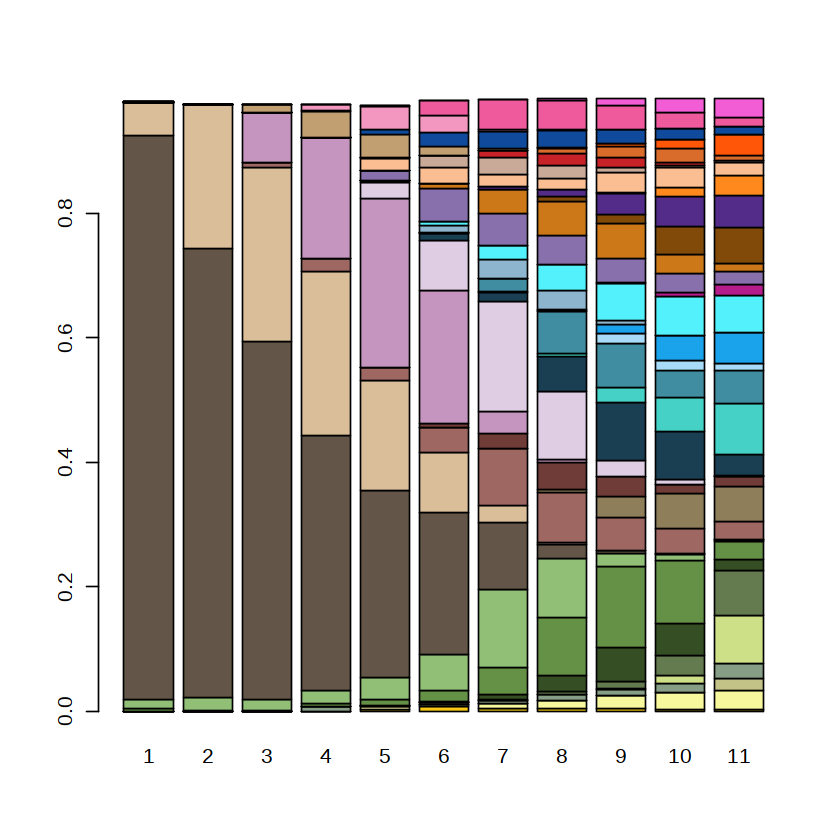

In [11]:
barplot(ct_ag_inf,col = rownames(ct_ag_inf))

In [ ]:
fwrite(mcf@mc_t_infer, "mm_mc_t_infer.csv")